In [2]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features, read_duration,checkForExist,read_did_pred,ScoresAveraging,DoneFeatureMan
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
from preamble import *
Cat = [20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]

amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']


0.0994370149558 0.0994370149558 0.0498167549821
0.0667435053216 0.0667435053216 0.0336431716085
0.0898952375277 0.0898952375277 0.0449557712546
0.0245287497367 0.0245287497367 0.0113868240028
0.000812302977978 0.000812302977978 0.00131362939213
0.0583928431942 0.0583928431942 0.0282641241198
0.00386660028626 0.00386660028626 0.0019383418975
0.0393627323442 0.0393627323442 0.0196720439284
0.0083100296238 0.0083100296238 0.00497936426869
0.0289853622999 0.0289853622999 0.0145757455831
0.0115493200708 0.0115493200708 0.00594026049941


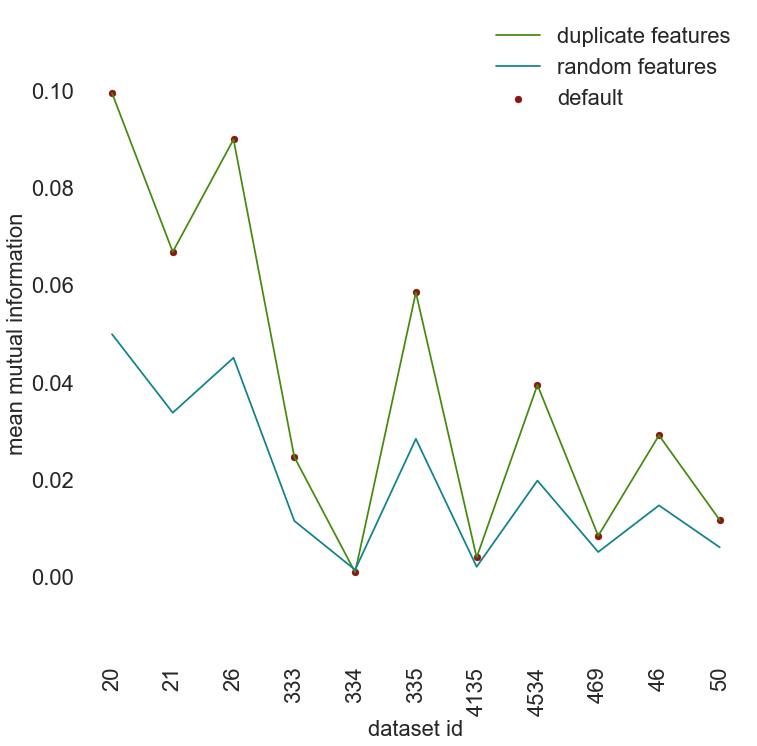

adjusted


In [9]:
#Adjusted Mutual Information 
from LocalDatasets import read_did,read_did_cat,readDict
from metafeatures import information_theoretic_metafeatures
from Noise2 import add_copy,add_copy_features,add_noise_features2,add_noise_features3,create_features
from preamble import *
import sklearn
Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]
did = 46
x1 = []
x2 = []
x3 = []
x4 = []
for z,did in enumerate(Cat):
    X,y = read_did(did)
    cat = read_did_cat(did)
    mutual_informations = [sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x1.append(np.mean(mutual_informations))
#     x1.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    amount = readDict(did)['NumberOfFeatures'] - 1
    for i in range(amount):
        cat.append(True)
    X = add_copy(X,amount)
    mutual_informations = [sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x2.append(np.mean(mutual_informations))
    X,y = read_did(did)
    X = add_noise_features2(X,cat,amount)     
    mutual_informations = [sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x3.append(np.mean(mutual_informations))
    X = create_features(y)
    cat = [True,True]
    mutual_informations = [sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x4.append(np.mean(mutual_informations))
    print(x1[z],x2[z],x3[z])
fig, ax = plt.subplots()
cl = sns.hls_palette(4, l=.3, s=.8)
x_axis =range(len(Cat))
# _= ax.plot(x_axis,x1, color = cl[0],ls = ':' ,label = 'default')
_= ax.scatter(x_axis,x1, color = cl[0],label = 'default')
# _= ax.plot(x_axis,x4, color = cl[3] ,label = 'target')
_= ax.plot(x_axis,x2, color = cl[1], label = 'duplicate features' )
_= ax.plot(x_axis,x3, color = cl[2], label = 'random features' )
_=plt.xticks(x_axis, Cat,rotation='vertical')
# _=plt.title('adjusted Mean mutual information for individual datasets')
_=plt.ylabel('mean mutual information')
_=plt.xlabel('dataset id')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
# ax.set_yscale("log", nonposy='clip')
# plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.legend( prop={'size': 22})
_=plt.show()
print('adjusted')

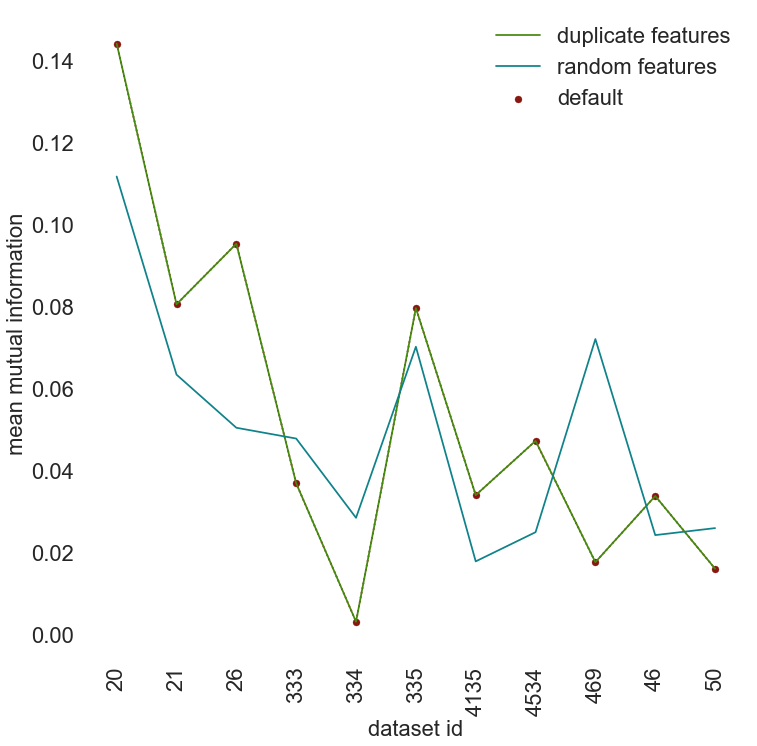

normalized


In [50]:
# normalized mean mutual information
from LocalDatasets import read_did,read_did_cat,readDict
from metafeatures import information_theoretic_metafeatures
from Noise2 import add_copy,add_copy_features,add_noise_features2,add_noise_features3,create_features
from preamble import *
import sklearn
Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]
did = 46
x1 = []
x2 = []
x3 = []
x4 = []
for did in Cat:
    X,y = read_did(did)
    cat = read_did_cat(did)
    amount = readDict(did)['NumberOfFeatures'] - 1 
    mutual_informations = [sklearn.metrics.normalized_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x1.append(np.mean(mutual_informations))
    for i in range(amount):
        cat.append(True)
    X = add_copy(X,amount)
    mutual_informations = [sklearn.metrics.normalized_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x2.append(np.mean(mutual_informations))
    X,y = read_did(did)
    X = add_noise_features2(X,cat,amount) 
    mutual_informations = [sklearn.metrics.normalized_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x3.append(np.mean(mutual_informations))
    X = create_features(y)
    cat = [True,True]
    mutual_informations = [sklearn.metrics.normalized_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x4.append(np.mean(mutual_informations))
#     x4.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
fig, ax = plt.subplots()
cl = sns.hls_palette(4, l=.3, s=.8)
x_axis =range(len(Cat))
_= ax.plot(x_axis,x1, color = cl[0],ls = ':' )
_= ax.scatter(x_axis,x1, color = cl[0] ,label = 'default')
# _= ax.plot(x_axis,x4, color = cl[3] ,label = 'target')
_= ax.plot(x_axis,x2, color = cl[1], label = 'duplicate features' )
_= ax.plot(x_axis,x3, color = cl[2], label = 'random features' )
_=plt.xticks(x_axis, Cat,rotation='vertical')
# _=plt.title('adjusted Mean mutual information for individual datasets')
_=plt.ylabel('mean mutual information')
_=plt.xlabel('dataset id')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
# ax.set_yscale("log", nonposy='clip')
# plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.legend( prop={'size': 22})
_=plt.show()
print('normalized')

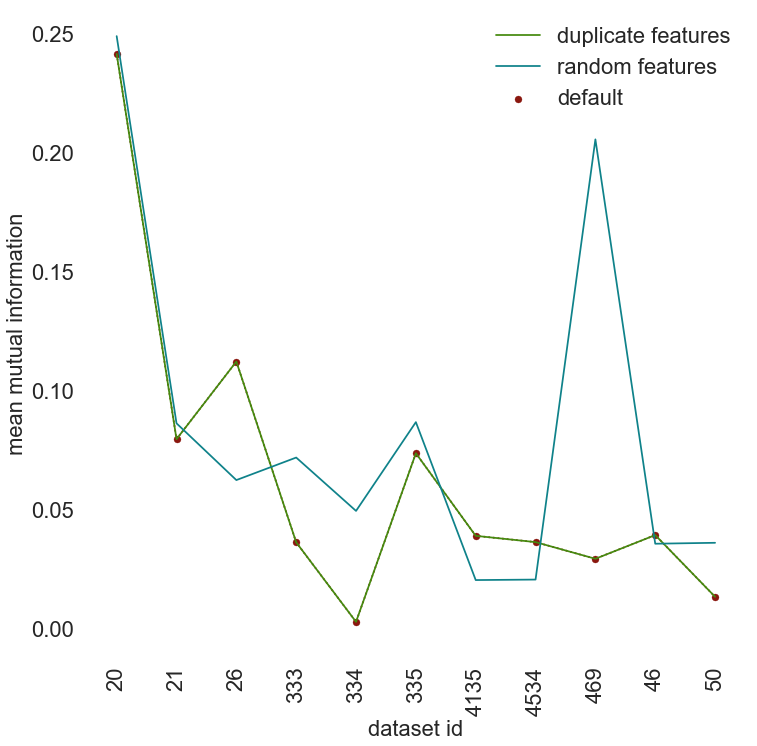

In [52]:
# default mean mutual information
from LocalDatasets import read_did,read_did_cat,readDict
from metafeatures import information_theoretic_metafeatures
from Noise2 import add_copy,add_copy_features,add_noise_features2,add_noise_features3,create_features
from preamble import *
import sklearn
Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]
did = 46
x1 = []
x2 = []
x3 = []
x4 = []
for did in Cat:
    X,y = read_did(did)
    cat = read_did_cat(did)
    mutual_informations = [sklearn.metrics.mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x1.append(np.mean(mutual_informations))
#     x1.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    amount = readDict(did)['NumberOfFeatures'] - 1    
    X = add_noise_features2(X,cat,amount) 
    for i in range(amount):
        cat.append(True)
    mutual_informations = [sklearn.metrics.mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x3.append(np.mean(mutual_informations))
#     x3.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    X,y = read_did(did)
    X = add_copy(X,amount)
    mutual_informations = [sklearn.metrics.mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x2.append(np.mean(mutual_informations))
#     x2.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
    X = create_features(y)
    cat = [True,True]
    mutual_informations = [sklearn.metrics.mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
    x4.append(np.mean(mutual_informations))
#     x4.append(information_theoretic_metafeatures(np.array(X), np.array(y), cat)['MeanMutualInformation'])
fig, ax = plt.subplots()
cl = sns.hls_palette(4, l=.3, s=.8)
x_axis =range(len(Cat))
_= ax.plot(x_axis,x1, color = cl[0],ls = ':' )
_= ax.scatter(x_axis,x1, color = cl[0] ,label = 'default')
# _= ax.plot(x_axis,x4, color = cl[3] ,label = 'target')
_= ax.plot(x_axis,x2, color = cl[1], label = 'duplicate features' )
_= ax.plot(x_axis,x3, color = cl[2], label = 'random features' )
_=plt.xticks(x_axis, Cat,rotation='vertical')
# _=plt.title('adjusted Mean mutual information for individual datasets')
_=plt.ylabel('mean mutual information')
_=plt.xlabel('dataset id')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(12)
fig.set_figwidth(12)
# ax.set_yscale("log", nonposy='clip')
# plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.legend( prop={'size': 22})
_=plt.show()

In [ ]:
# paper comparison
from LocalDatasets import read_did,read_did_cat
from Noise2 import add_noise_featuresN,add_copy_features
import sklearn
mutualInf = []
mutualInf2 = []
amountList = [0,0.25,0.5,0.75,1.0]
n = 3
# Cat.remove(3)
for i,amount in enumerate(amountList):
    mutualInf.append(0)
    mutualInf2.append(0)
    for did in Cat:
        X,y = read_did(did)
        cat = read_did_cat(did)
        if not amount == 0:
            X = add_noise_featuresN(X,cat,round(amount*(readDict(did)['NumberOfFeatures']-1)),n)
            for j in range(round(amount*(readDict(did)['NumberOfFeatures']-1))):
                cat.append(True)
        mut = np.mean([sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T])/len(Cat)
        if mut < 0 or mut >= 0:
            mutualInf[i] = mutualInf[i] + mut
        
print(mutualInf)
print(mutualInf2)
amountList2 = []
for amount in amountList:
    amountList2.append(int((1-1/(1+amount))*100))
# for i in amountList:
#     amountList2.append(i*100)
amountList3 = ['0%','20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Adjusted mutual information for datasets with added random features',fontdict = {'fontsize': 22} )
_=ax.plot(amountList2, mutualInf)
# _=ax.plot(amountList2,mutualInf2, ls = ":",label = 'duplicate features')
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Adjusted Mutual Information',fontdict = {'fontsize': 22})
_=plt.xlabel('percentage random features of the total dataset',fontdict = {'fontsize': 22})
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
for i,amount in enumerate(amountList2):
    _=plt.axvline(x=amount,color= 'black')
    _=plt.axhline(y=mutualInf[i],color = 'black')

ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show() 

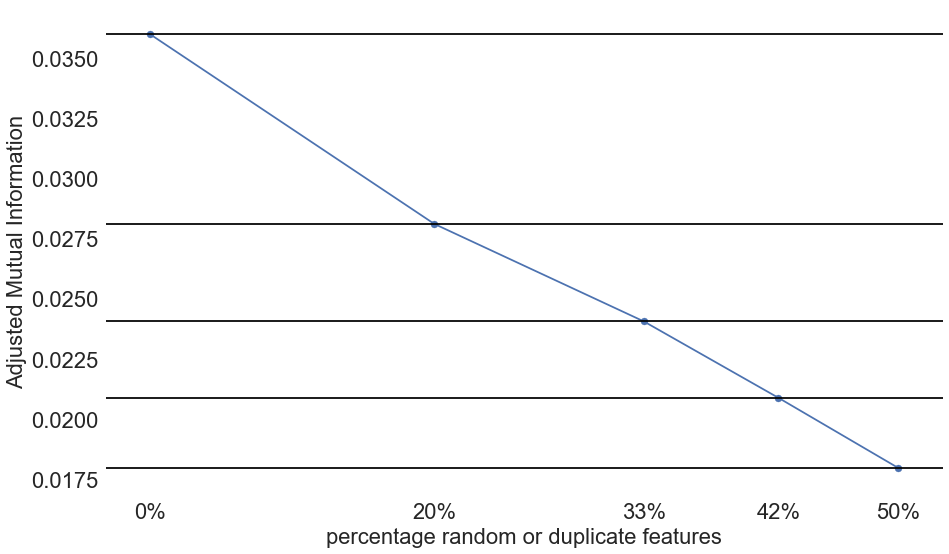

In [11]:
# # mutual information paper style but with dulicates
# from LocalDatasets import read_did,read_did_cat
# from Noise2 import add_noise_featuresN,add_copy_features,add_copy
# import sklearn
# mutualInf = []
# mutualInf2 = []
# amountList = [0,0.25,0.5,0.75,1.0]
# n = 3
# # Cat.remove(3)
# for i,amount in enumerate(amountList):
#     mutualInf.append(0)
#     mutualInf2.append(0)
#     for did in Cat:
#         X,y = read_did(did)
#         cat = read_did_cat(did)
#         if not amount == 0:
#             X = add_noise_featuresN(X,cat,round(amount*(readDict(did)['NumberOfFeatures']-1)),n)
#             for j in range(round(amount*(readDict(did)['NumberOfFeatures']-1))):
#                 cat.append(True)
#         mut = np.mean([sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T])/len(Cat)
#         if mut < 0 or mut >= 0:
#             mutualInf[i] = mutualInf[i] + mut
#         X,y = read_did(did)
#         if not amount == 0:
#             X = add_copy(X,round(amount*(readDict(did)['NumberOfFeatures']-1)))
#         mut = np.mean([sklearn.metrics.adjusted_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T])/len(Cat)
#         if mut < 0 or mut >= 0:
#             mutualInf2[i] = mutualInf2[i] + mut
# print(mutualInf)
# print(mutualInf2)
# amountList2 = []
# for amount in amountList:
#     amountList2.append(int((1-1/(1+amount))*100))
# # for i in amountList:
# #     amountList2.append(i*100)
# amountList3 = ['0%','20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Adjusted mutual information for datasets with added random features the straight line and duplicate features the dotted line' )
_=ax.plot(amountList2, mutualInf)
# _=ax.plot(amountList2,mutualInf2, ls = ":",label = 'duplicate features')
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Adjusted Mutual Information')
_=plt.xlabel('percentage random or duplicate features')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
    _=plt.axhline(y=mutualInf[i],color = 'black')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show()

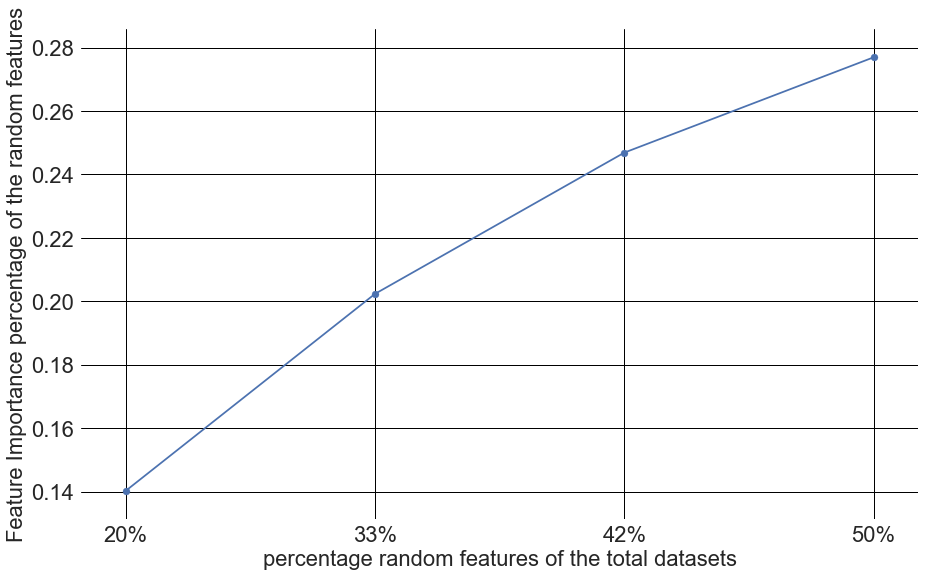

3 numerical


In [18]:
# Feature importance paper style
# from LocalDatasets import read_did,read_did_cat
# from Noise2 import add_noise_featuresN
# from sklearn.ensemble import RandomForestClassifier
# import sklearn
# mutualInf = []
# amountList = [0.25,0.5,0.75,1.0]
# n = 100
# # Cat.remove(3)
# didList = NonCat
# ImpFeats = []
# for i in didList:
#     ImpFeats.append([])
# for i,amount in enumerate(amountList):
#     mutualInf.append(0)
#     for k,did in enumerate(didList):
#         X,y = read_did(did)
#         cat = read_did_cat(did)
#         amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
#         X = add_noise_featuresN(X,cat,amountAdded,n)
#         clf = RandomForestClassifier()
#         clf.fit(X,y)
#         feats_imp = clf.feature_importances_
#         avg = 0
#         for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
#             avg = avg + feats_imp[j]/len(didList)
#         ImpFeats[k].append(avg*len(didList))
#         if avg < 0 or avg >= 0:
#             mutualInf[i] = mutualInf[i] + avg
# print(mutualInf)
# amountList2 = []
# # for amount in amountList:
# #     amountList2.append(int((1-1/(1+amount))*100))
# for i in amountList:
#     amountList2.append(i*100)
# amountList3 = ['20%','33%','42%', '50%']
mutualInf = [0.14022466823184054, 0.20234258696598623, 0.24686948762943739, 0.27692710666018466]
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the random features')
_=plt.xlabel('percentage random features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print(str(n),'numerical')

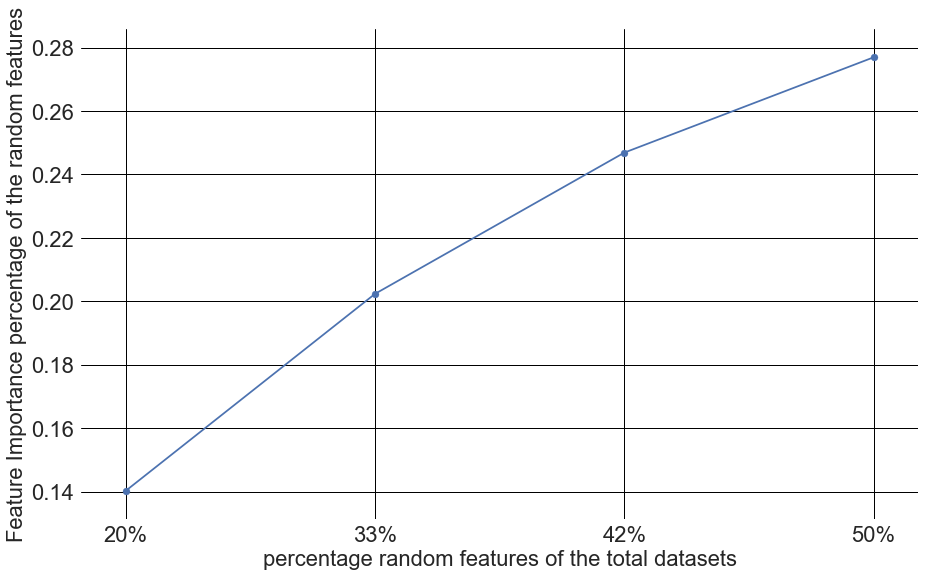

3 numerical


In [17]:
# Feature importance paper style
# from LocalDatasets import read_did,read_did_cat
# from Noise2 import add_noise_featuresN
# from sklearn.ensemble import RandomForestClassifier
# import sklearn
# mutualInf = []
# amountList = [0.25,0.5,0.75,1.0]
# n = 1
# # Cat.remove(3)
# didList = NonCat
# ImpFeats = []
# for i in didList:
#     ImpFeats.append([])
# for i,amount in enumerate(amountList):
#     mutualInf.append(0)
#     for k,did in enumerate(didList):
#         X,y = read_did(did)
#         cat = read_did_cat(did)
#         amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
#         X = add_noise_featuresN(X,cat,amountAdded,n)
#         clf = RandomForestClassifier()
#         clf.fit(X,y)
#         feats_imp = clf.feature_importances_
#         avg = 0
#         for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
#             avg = avg + feats_imp[j]/len(didList)
#         ImpFeats[k].append(avg*len(didList))
#         if avg < 0 or avg >= 0:
#             mutualInf[i] = mutualInf[i] + avg
# print(mutualInf)
# amountList2 = []
# # for amount in amountList:
# #     amountList2.append(int((1-1/(1+amount))*100))
# for i in amountList:
#     amountList2.append(i*100)
# amountList3 = ['20%','33%','42%', '50%']
mutualInf = [0.14022466823184054, 0.20234258696598623, 0.24686948762943739, 0.27692710666018466]
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the random features')
_=plt.xlabel('percentage random features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print(str(n),'numerical')

[0.11674073986592144, 0.17642297076833774, 0.22837567358067018, 0.28388927491625937]


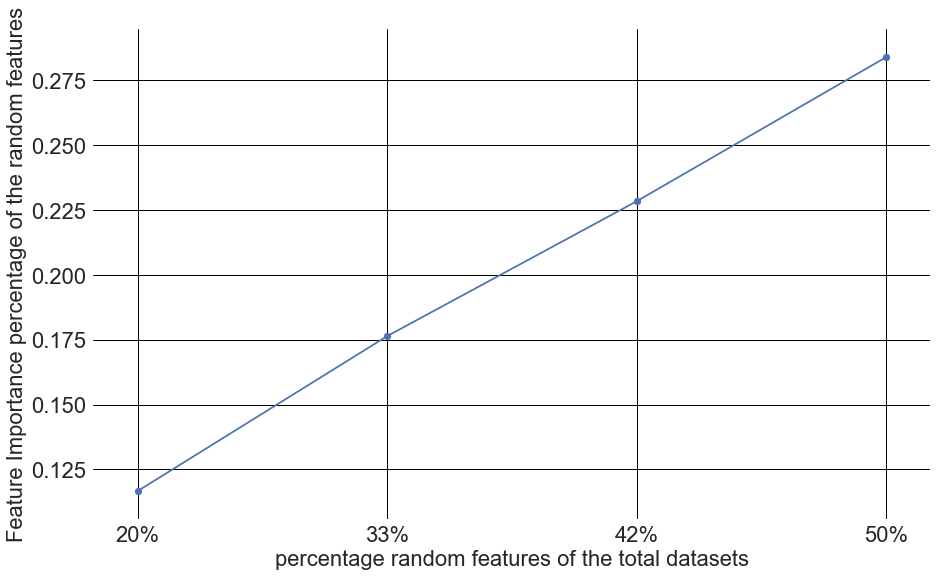

3 categorical


In [19]:
# Feature importance paper style
from LocalDatasets import read_did,read_did_cat
from Noise2 import add_noise_featuresN
from sklearn.ensemble import RandomForestClassifier
import sklearn
mutualInf = []
amountList = [0.25,0.5,0.75,1.0]
n = 3
# Cat.remove(3)
didList = Cat
ImpFeats = []
for i in didList:
    ImpFeats.append([])
for i,amount in enumerate(amountList):
    mutualInf.append(0)
    for k,did in enumerate(didList):
        X,y = read_did(did)
        cat = read_did_cat(did)
        amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
        X = add_noise_featuresN(X,cat,amountAdded,n)
        clf = RandomForestClassifier()
        clf.fit(X,y)
        feats_imp = clf.feature_importances_
        avg = 0
        for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
            avg = avg + feats_imp[j]/len(didList)
        ImpFeats[k].append(avg*len(didList))
        if avg < 0 or avg >= 0:
            mutualInf[i] = mutualInf[i] + avg
print(mutualInf)
amountList2 = []
# for amount in amountList:
#     amountList2.append(int((1-1/(1+amount))*100))
for i in amountList:
    amountList2.append(i*100)
amountList3 = ['20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the random features')
_=plt.xlabel('percentage random features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print(str(n),'categorical')

[0.25737990512953463, 0.32904141770279283, 0.38518730881850105, 0.43451710340333588]


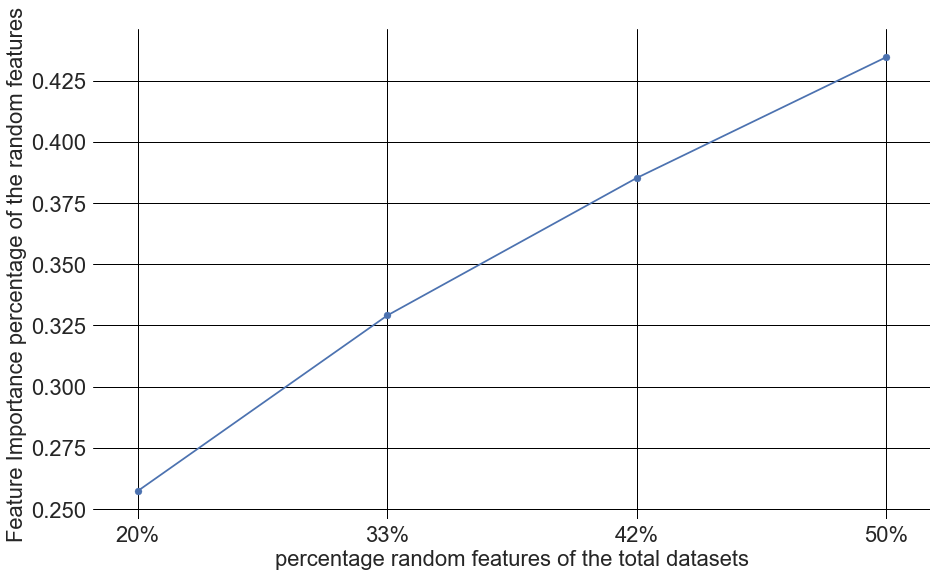

100 categorical


In [15]:
# Feature importance paper style
from LocalDatasets import read_did,read_did_cat
from Noise2 import add_noise_featuresN
from sklearn.ensemble import RandomForestClassifier
import sklearn
mutualInf = []
amountList = [0.25,0.5,0.75,1.0]
n = 100
# Cat.remove(3)
didList = Cat
ImpFeats = []
for i in didList:
    ImpFeats.append([])
for i,amount in enumerate(amountList):
    mutualInf.append(0)
    for k,did in enumerate(didList):
        X,y = read_did(did)
        cat = read_did_cat(did)
        amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
        X = add_noise_featuresN(X,cat,amountAdded,n)
        clf = RandomForestClassifier()
        clf.fit(X,y)
        feats_imp = clf.feature_importances_
        avg = 0
        for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
            avg = avg + feats_imp[j]/len(didList)
        ImpFeats[k].append(avg*len(didList))
        if avg < 0 or avg >= 0:
            mutualInf[i] = mutualInf[i] + avg
print(mutualInf)
amountList2 = []
# for amount in amountList:
#     amountList2.append(int((1-1/(1+amount))*100))
for i in amountList:
    amountList2.append(i*100)
amountList3 = ['20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the random features')
_=plt.xlabel('percentage random features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print(str(n),'categorical')

[0.17889702717124648, 0.30281775300146269, 0.41575092403397218, 0.50466080885758913]


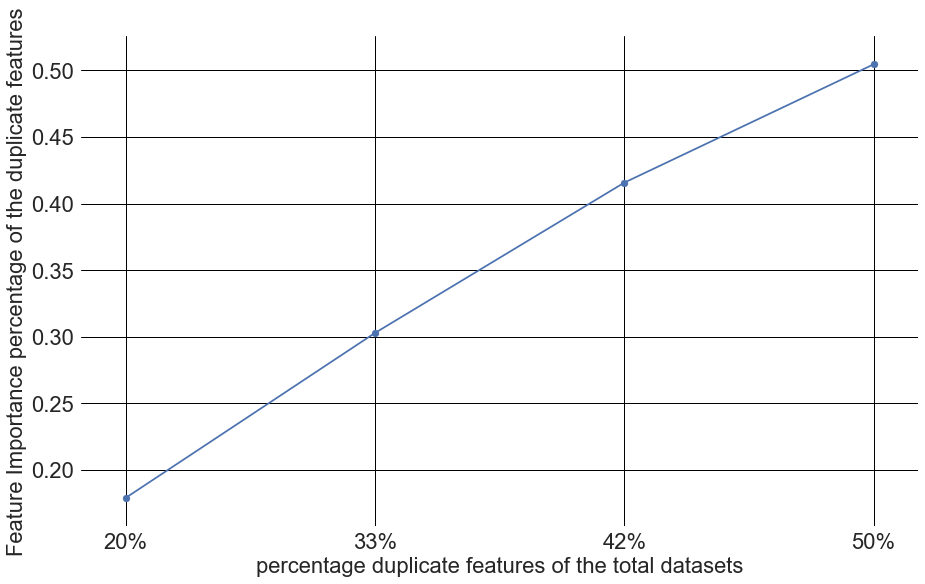

duplicate feature importance


In [21]:
# Feature importance duplicate features
from LocalDatasets import read_did,read_did_cat
from Noise2 import add_noise_featuresN,add_copy
from sklearn.ensemble import RandomForestClassifier
import sklearn
mutualInf = []
amountList = [0.25,0.5,0.75,1.0]
n = 100
# Cat.remove(3)
didList = NonCat
ImpFeats = []
for i in didList:
    ImpFeats.append([])
for i,amount in enumerate(amountList):
    mutualInf.append(0)
    for k,did in enumerate(didList):
        X,y = read_did(did)
        cat = read_did_cat(did)
        amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
        X = add_copy(X,amountAdded)
        clf = RandomForestClassifier()
        clf.fit(X,y)
        feats_imp = clf.feature_importances_
        avg = 0
        for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
            avg = avg + feats_imp[j]/len(didList)
        ImpFeats[k].append(avg*len(didList))
        if avg < 0 or avg >= 0:
            mutualInf[i] = mutualInf[i] + avg
print(mutualInf)
amountList2 = []
# for amount in amountList:
#     amountList2.append(int((1-1/(1+amount))*100))
for i in amountList:
    amountList2.append(i*100)
amountList3 = ['20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the duplicate features')
_=plt.xlabel('percentage duplicate features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print('duplicate feature importance, numerical')

[0.16422661194378146, 0.26097624617059628, 0.3570825190448102, 0.48660199350731392]


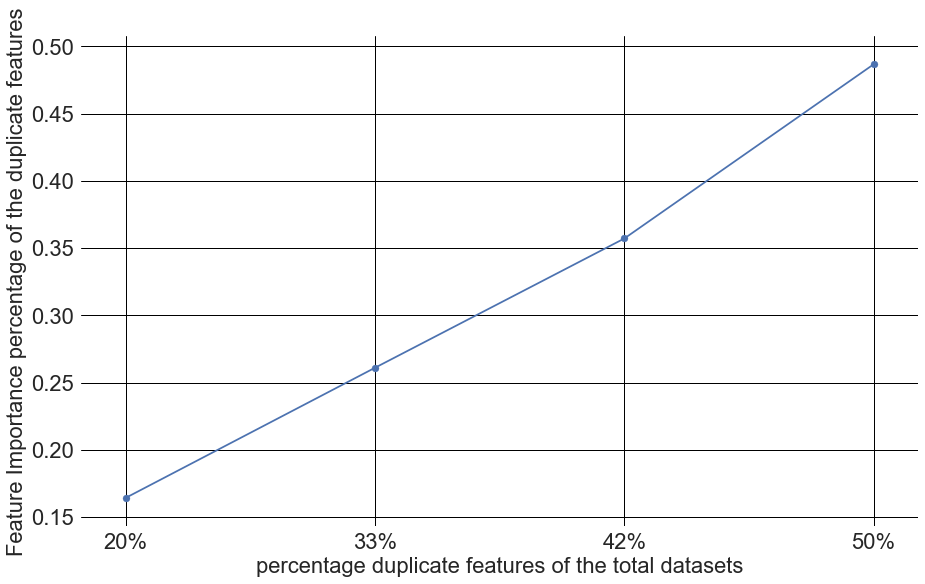

duplicate feature importance categorical


In [22]:
# Feature importance duplicate features
from LocalDatasets import read_did,read_did_cat
from Noise2 import add_noise_featuresN,add_copy
from sklearn.ensemble import RandomForestClassifier
import sklearn
mutualInf = []
amountList = [0.25,0.5,0.75,1.0]
n = 100
# Cat.remove(3)
didList = Cat
ImpFeats = []
for i in didList:
    ImpFeats.append([])
for i,amount in enumerate(amountList):
    mutualInf.append(0)
    for k,did in enumerate(didList):
        X,y = read_did(did)
        cat = read_did_cat(did)
        amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
        X = add_copy(X,amountAdded)
        clf = RandomForestClassifier()
        clf.fit(X,y)
        feats_imp = clf.feature_importances_
        avg = 0
        for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
            avg = avg + feats_imp[j]/len(didList)
        ImpFeats[k].append(avg*len(didList))
        if avg < 0 or avg >= 0:
            mutualInf[i] = mutualInf[i] + avg
print(mutualInf)
amountList2 = []
# for amount in amountList:
#     amountList2.append(int((1-1/(1+amount))*100))
for i in amountList:
    amountList2.append(i*100)
amountList3 = ['20%','33%','42%', '50%']
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=plt.ylabel('Feature Importance percentage of the duplicate features')
_=plt.xlabel('percentage duplicate features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print('duplicate feature importance categorical')

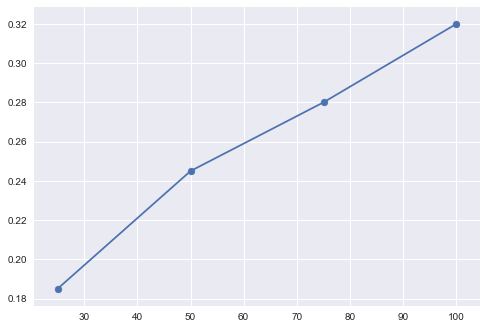

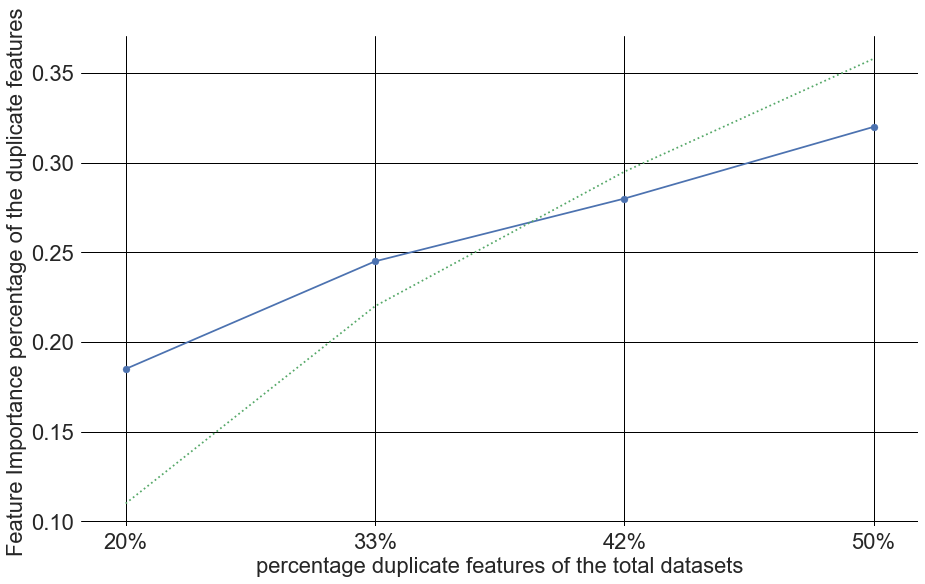

duplicate feature importance categorical


In [24]:
# # Feature importance duplicate features
# from LocalDatasets import read_did,read_did_cat
# from Noise2 import add_noise_featuresN,add_copy
# from sklearn.ensemble import RandomForestClassifier
# import sklearn
# mutualInf = []
# amountList = [0.25,0.5,0.75,1.0]
# n = 100
# # Cat.remove(3)
# didList = Cat
# ImpFeats = []
# for i in didList:
#     ImpFeats.append([])
# for i,amount in enumerate(amountList):
#     mutualInf.append(0)
#     for k,did in enumerate(didList):
#         X,y = read_did(did)
#         cat = read_did_cat(did)
#         amountAdded = round(amount*(readDict(did)['NumberOfFeatures']-1))
#         X = add_copy(X,amountAdded)
#         clf = RandomForestClassifier()
#         clf.fit(X,y)
#         feats_imp = clf.feature_importances_
#         avg = 0
#         for j in range(readDict(did)['NumberOfFeatures']-1,readDict(did)['NumberOfFeatures']-1+amountAdded):
#             avg = avg + feats_imp[j]/len(didList)
#         ImpFeats[k].append(avg*len(didList))
#         if avg < 0 or avg >= 0:
#             mutualInf[i] = mutualInf[i] + avg
# print(mutualInf)
# amountList2 = []
# # for amount in amountList:
# #     amountList2.append(int((1-1/(1+amount))*100))
# for i in amountList:
#     amountList2.append(i*100)
# amountList3 = ['20%','33%','42%', '50%']
mutualInf = [0.185,0.245,0.28,0.32]
mutualInf2 = [0.11,0.22,0.295,0.358]
fig, ax = plt.subplots()
# _=plt.title('Feature importance of random numerical features times one hundred, in numerical datasets' )
_=ax.plot(amountList2, mutualInf)
_=ax.scatter(amountList2, mutualInf)
_=ax.plot(amountList2, mutualInf2, ls = ':')
_=plt.ylabel('Feature Importance percentage of the duplicate features')
_=plt.xlabel('percentage added features of the total datasets')
_=plt.xticks(amountList2,amountList3 )
fig.set_figheight(9)
fig.set_figwidth(15)
# _=plt.axhline(x = 20,linewidth=2, color = 'k')
# for i,amount in enumerate(amountList2):
#     _=plt.axvline(x=amount,color= 'black')
#     _=plt.axhline(y=mutualInf[i],color = 'black')
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()
print('duplicate feature importance categorical')

In [5]:
mutual_informations

[0.6452881308007814, 0.6452881308007814]

In [9]:
readDict(50)

{'MajorityClassSize': 626,
 'MaxNominalAttDistinctValues': 3,
 'MinorityClassSize': 332,
 'NumberOfClasses': 2,
 'NumberOfFeatures': 10,
 'NumberOfInstances': 958,
 'NumberOfInstancesWithMissingValues': 0,
 'NumberOfMissingValues': 0,
 'NumberOfNumericFeatures': 0,
 'NumberOfSymbolicFeatures': 10,
 'did': 50,
 'format': 'ARFF',
 'name': 'tic-tac-toe',
 'status': 'active'}

In [47]:
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score
X,y = read_did(did)
cat = read_did_cat(did)
mutual_informations = [normalized_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
print(np.mean(mutual_informations))
amount = readDict(did)['NumberOfFeatures'] - 1
for i in range(amount):
    cat.append(True)

X = add_copy(X,amount)
mutual_informations = [normalized_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
print(np.mean(mutual_informations))
X,y = read_did(did)
X = add_noise_features2(X,cat,amount) 
mutual_informations = [normalized_mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]
print(np.mean(mutual_informations))

0.0175044368683
0.0175044368683
0.0718436493202


In [18]:
[sklearn.metrics.mutual_info_score(np.array(y), column[0]) for column in np.array(X)[:, np.where(cat)].T]

[0.066853331047830422, 0.051087683004767306]

In [46]:
did = 469

In [71]:
from Noise2 import distr_guessed
for i,item in enumerate(x3):
    if x1[i] < x3[i]:
        X,y = read_did(Cat[i])
        X2 = list(map(list, zip(*X)))
        AvgC = []
        for z in X2:
            AvgC.append(len(distr_guessed(z)))
        print(readDict(Cat[i])['NumberOfClasses'],sum(AvgC)/len(AvgC))


10 6.866666666666666
4 3.5
2 2.8333333333333335
2 2.8333333333333335
2 2.8333333333333335
6 5.25
2 3.0


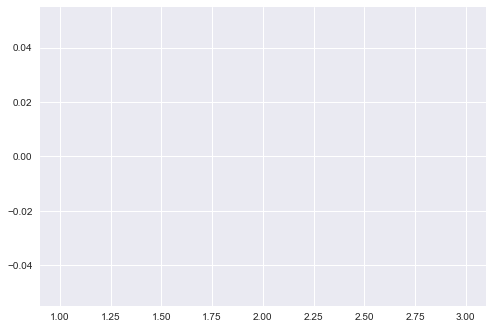

In [7]:
plt.hist([0.0994370149558, 0.0994370149558, 0.0497202246175], [1,2,3])
plt.show()

In [10]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x= Cat,
    y=x1,
    name='default'
)
trace2 = go.Bar(
    x=Cat,
    y=x2,
    name='duplicate features'
)

trace3 = go.Bar(
    x=Cat,
    y=x3,
    name='random features'
)

data = [trace1, trace2,trace3]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [8]:
Cat = [20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]

In [ ]:
# _= ax.scatter(x_axis,x1, color = cl[0],label = 'default')
# # _= ax.plot(x_axis,x4, color = cl[3] ,label = 'target')
# _= ax.plot(x_axis,x2, color = cl[1], label = 'duplicate features' )
# _= ax.plot(x_axis,x3, color = cl[2], label = 'random features' )

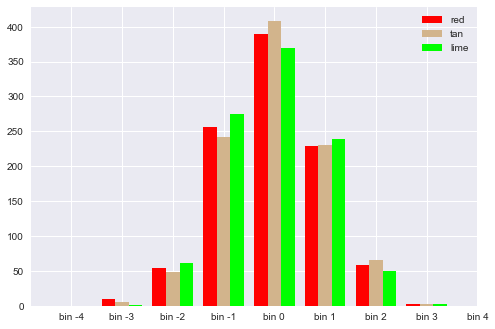

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(1000, 3)
bins = np.arange(-4.5, 4.5, 1)
colors = ['red', 'tan', 'lime']

plt.hist(x, bins=bins, color=colors, label=colors)
plt.legend()
plt.xticks(bins + 0.5, ['bin ' + str(int(x)) for x in (bins + 0.5)])
plt.show()

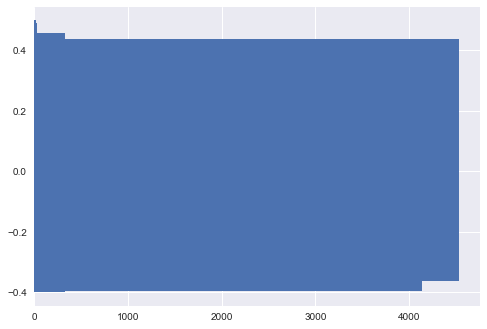

In [26]:
plt.barh(x1,Cat)
plt.show()

In [25]:
Cat

[20, 21, 26, 333, 334, 335, 4135, 4534, 469, 46, 50]

In [20]:
for i in Cat:
    print(i)

20
21
26
333
334
335
4135
4534
469
46
50
